In [2]:
import pandas as pd
import re
from konlpy.tag import Okt
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager, rc
from wordcloud import WordCloud
import matplotlib.font_manager as fm
import seaborn as sns

df = pd.read_csv(r'music_최종.csv', parse_dates=['발매일'], encoding='cp949')
df.head()

,순위,제목,가수,가사,장르,발매일,Month
0,1,사랑을 했다 (LOVE SCENARIO),iKON,사랑을 했다 우리가 만나 지우지 못할 추억이 됐다 볼만한 멜로드라마 괜찮은 결말 그...,랩/힙합,2018-01-25,201803
1,2,별이 빛나는 밤,마마무 (Mamamoo),손끝이 시리더니 벌써 봄이 왔네 꿈같은 바람이 불어 곳곳에 여느 때 와는 다른 듯한...,댄스,2018-03-07,201803
2,3,뿜뿜,모모랜드 (MOMOLAND),설레어 너와 나의 랑데뷰 랑데뷰 내 마음을 들었다 놨다 해 맘대루 맘대루 지금 내 ...,댄스,2018-01-03,201803
3,4,그날처럼,장덕철,참 많은 시간이 흘러가고 넌 어떻게 사는지 참 궁금해 날 걱정하는 사람들에게 다 잊...,발라드,2017-11-28,201803
4,5,꽃 길,BIGBANG (빅뱅),그땐 참 좋았는데 말이야 너와 함께할 수만 있다면 때론 외롭고 슬퍼도 말이야 너와 ...,R&B/Soul,2018-03-13,201803


In [3]:
# '제목' 컬럼에서 괄호와 그 안의 내용 제거
df['제목_가공'] = df['제목'].replace(to_replace='\([^)]*\)', value='', regex=True)
df.head()

,순위,제목,가수,가사,장르,발매일,Month,제목_가공
0,1,사랑을 했다 (LOVE SCENARIO),iKON,사랑을 했다 우리가 만나 지우지 못할 추억이 됐다 볼만한 멜로드라마 괜찮은 결말 그...,랩/힙합,2018-01-25,201803,사랑을 했다
1,2,별이 빛나는 밤,마마무 (Mamamoo),손끝이 시리더니 벌써 봄이 왔네 꿈같은 바람이 불어 곳곳에 여느 때 와는 다른 듯한...,댄스,2018-03-07,201803,별이 빛나는 밤
2,3,뿜뿜,모모랜드 (MOMOLAND),설레어 너와 나의 랑데뷰 랑데뷰 내 마음을 들었다 놨다 해 맘대루 맘대루 지금 내 ...,댄스,2018-01-03,201803,뿜뿜
3,4,그날처럼,장덕철,참 많은 시간이 흘러가고 넌 어떻게 사는지 참 궁금해 날 걱정하는 사람들에게 다 잊...,발라드,2017-11-28,201803,그날처럼
4,5,꽃 길,BIGBANG (빅뱅),그땐 참 좋았는데 말이야 너와 함께할 수만 있다면 때론 외롭고 슬퍼도 말이야 너와 ...,R&B/Soul,2018-03-13,201803,꽃 길


/var/folders/fr/phrsn26j1xq_xzdmg1t4v5600000gn/T/ipykernel_58615/3612271050.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='명사', y='빈도', data=top_nouns_df, palette='viridis')


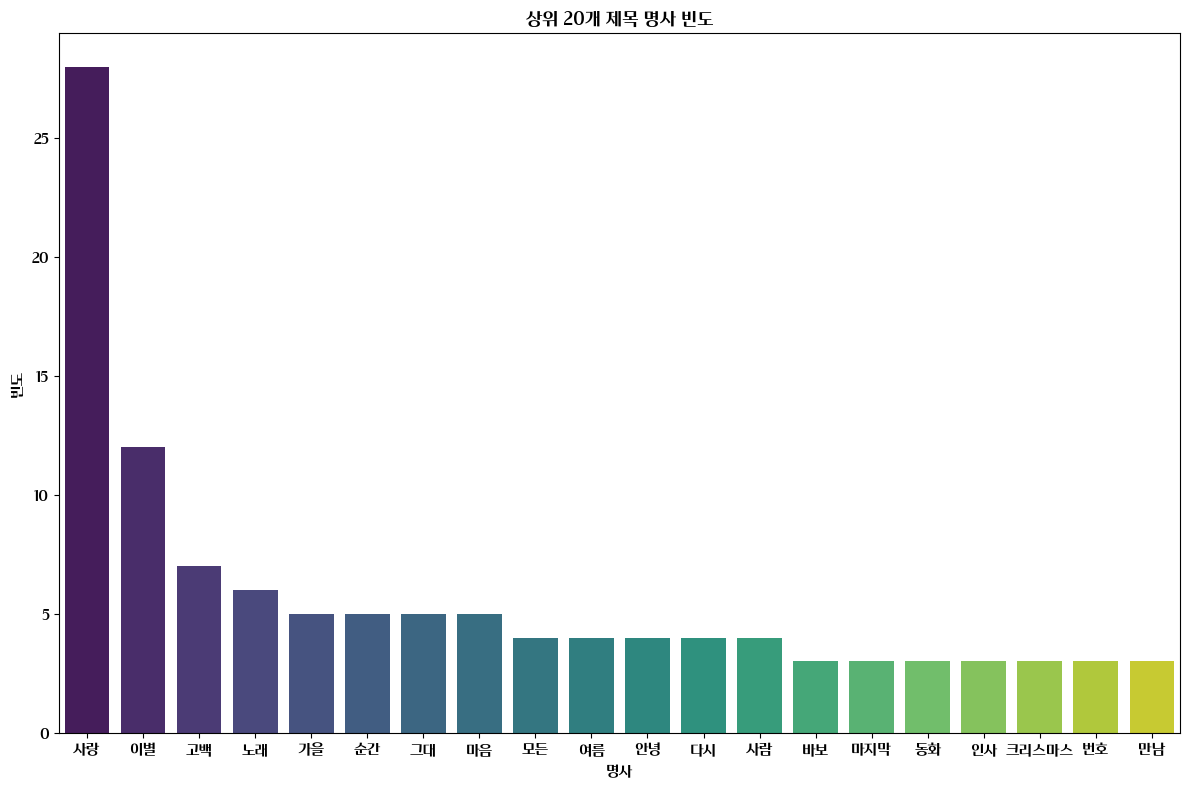

In [4]:
# 중복 제거
df = df.drop_duplicates(subset=['제목_가공'])

# 불용어 파일 읽기
with open('stopwords.txt', 'r', encoding='utf-8') as file:
    stop_words = file.readlines()
    stop_words = [word.strip() for word in stop_words]

okt = Okt()

#불용어 제거
def extract_nouns(text):
    nouns = okt.nouns(text)
    return [word for word in nouns if word not in stop_words and len(word) > 1]

df['제목_명사'] = df['제목_가공'].astype(str).apply(extract_nouns)

all_nouns = df['제목_명사'].sum()

# Counter를 사용하여 명사 빈도 계산
count_nouns = Counter(all_nouns)



font_path= "/Users/yoosukyeong/Library/Fonts/LeferiPointBlack.ttf"
font_name = fm.FontProperties(fname=font_path).get_name()

top_nouns = dict(count_nouns.most_common(20))
top_nouns_df = pd.DataFrame(top_nouns.items(), columns=['명사', '빈도'])

plt.rc('font', family=font_name)
plt.figure(figsize=(12, 8))
sns.barplot(x='명사', y='빈도', data=top_nouns_df, palette='viridis')
plt.title('상위 20개 제목 명사 빈도')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()